In [1]:
import pandas as pd
import numpy as np

In [21]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
data=df.drop(columns=['PassengerId','Ticket','Cabin','Embarked'])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [23]:
data.rename(columns={'SibSp':'Siblings/Spouses Aboard','Parch':'Parents/Children Aboard'},inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [24]:
x=data[['Age','Fare']] # input
y=data['Survived'] # output

In [25]:
from sklearn.neighbors import KNeighborsClassifier
neighbor=KNeighborsClassifier(n_neighbors=3)
neighbor.fit(x,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

- we have to fill the Nan values

In [26]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [27]:
data[['Age']]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [28]:
data.isnull().sum()

Survived                     0
Pclass                       0
Name                         0
Sex                          0
Age                        177
Siblings/Spouses Aboard      0
Parents/Children Aboard      0
Fare                         0
dtype: int64

In [29]:
data['Age'].mean()

29.69911764705882

In [30]:
data['Age'].fillna(data['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [31]:
data['Age'].isnull().sum()

177

In [32]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [33]:
data['Age'].isnull().sum()

0

In [34]:
x=data[['Age','Fare']] # input
y=data['Survived'] # output/actual value

# <span style="color:#0ee327; font-family: Babas; font-size: 2em">K NEAREST NEIGHBORS(KNN)</span>

# <span style="color:red">K NEAREST NEIGHBORS(KNN)</span>

In [25]:
from sklearn.neighbors import KNeighborsClassifier 
# agent
neighbor=KNeighborsClassifier(n_neighbors=3) #1. how to learn/algo/agent=KNN=3NN
neighbor.fit(x,y)#2. learning (input,output) using train

KNeighborsClassifier(n_neighbors=3)

In [26]:
predictons=neighbor.predict(x) #3. prediction 3nn(input) -> predictions

In [27]:
predictons

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,

# Metrics

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y,predictons)

0.8047138047138047

In [30]:
print(x.shape,y.shape)

(891, 2) (891,)


In [31]:
trian_x=x[:600]
trian_y=y[:600]

test_x=x[600:]
test_y=y[600:]

print(trian_x.shape,test_x.shape)

(600, 2) (291, 2)


In [32]:
neighbor.fit(trian_x,trian_y)

KNeighborsClassifier(n_neighbors=3)

In [33]:
predictons=neighbor.predict(test_x)
print(accuracy_score(test_y,predictons))

0.6529209621993127


### K=1

In [34]:
neighbor=KNeighborsClassifier(n_neighbors=1)
neighbor.fit(trian_x,trian_y)

predictons=neighbor.predict(trian_x) # prediction 1nn(input) -> predictions on train example
print("train accuracy",accuracy_score(trian_y,predictons)) #evaluation on test(y)



predictons=neighbor.predict(test_x)  # prediction 1nn(input) -> predictions on test example
print("test accuracy",accuracy_score(test_y,predictons)) # evaluation on test (y)

train accuracy 0.9483333333333334
test accuracy 0.6082474226804123


### K=3

In [35]:
neighbor=KNeighborsClassifier(n_neighbors=3)
neighbor.fit(trian_x,trian_y)

predictons=neighbor.predict(trian_x) # prediction 3nn(input) -> predictions on train example
print("train accuracy",accuracy_score(trian_y,predictons)) #evaluation on test(y)



predictons=neighbor.predict(test_x)  # prediction 3nn(input) -> predictions on test example
print("test accuracy",accuracy_score(test_y,predictons)) # evaluation on test (y)

train accuracy 0.7833333333333333
test accuracy 0.6529209621993127


### K=5

In [36]:
neighbor=KNeighborsClassifier(n_neighbors=5)
neighbor.fit(trian_x,trian_y)

predictons=neighbor.predict(trian_x) # prediction 5nn(input) -> predictions on train example
print("train accuracy",accuracy_score(trian_y,predictons)) #evaluation on test(y)



predictons=neighbor.predict(test_x)  # prediction 5nn(input) -> predictions on test example
print("test accuracy",accuracy_score(test_y,predictons)) # evaluation on test (y)

train accuracy 0.7416666666666667
test accuracy 0.6666666666666666


### K=7

In [37]:
neighbor=KNeighborsClassifier(n_neighbors=7)
neighbor.fit(trian_x,trian_y)

predictons=neighbor.predict(trian_x) # prediction 7nn(input) -> predictions on train example
print("train accuracy",accuracy_score(trian_y,predictons)) #evaluation on test(y)



predictons=neighbor.predict(test_x)  # prediction 7nn(input) -> predictions on test example
print("test accuracy",accuracy_score(test_y,predictons)) # evaluation on test (y)

train accuracy 0.7216666666666667
test accuracy 0.7010309278350515


### Validation

In [38]:
x=data[['Age','Fare']] # input
y=data['Survived'] # output/actual value
print(x.shape,y.shape)

trian_x=x[:600]
trian_y=y[:600]

val_x=x[600:700]
val_y=y[600:700]


test_x=x[700:]
test_y=y[700:]

print(trian_x.shape,test_x.shape)

(891, 2) (891,)
(600, 2) (191, 2)


### K=1

In [80]:
neighbor=KNeighborsClassifier(n_neighbors=1)
neighbor.fit(trian_x,trian_y)

predictons=neighbor.predict(trian_x) # prediction 1nn(input) -> predictions on train example
print("train accuracy",accuracy_score(trian_y,predictons)) #evaluation on test(y)



predictons=neighbor.predict(val_x)  # prediction 1nn(input) -> predictions on test [exercise]
print("val accuracy",accuracy_score(val_y,predictons)) # evaluation on test (y)

train accuracy 0.9483333333333334
val accuracy 0.64


In [81]:
predictons=neighbor.predict(test_x)  # prediction 1nn(input) -> predictions on test example
print("test accuracy",accuracy_score(test_y,predictons)) # evaluation on test (y)

test accuracy 0.5916230366492147


### K=3

In [82]:
neighbor=KNeighborsClassifier(n_neighbors=3)
neighbor.fit(trian_x,trian_y)

predictons=neighbor.predict(trian_x) # prediction 3nn(input) -> predictions on train example
print("train accuracy",accuracy_score(trian_y,predictons)) #evaluation on test(y)



predictons=neighbor.predict(val_x)  # prediction 3nn(input) -> predictions on test [exercise]
print("val accuracy",accuracy_score(val_y,predictons)) # evaluation on test (y)

train accuracy 0.7833333333333333
val accuracy 0.68


In [42]:
predictons=neighbor.predict(test_x)  # prediction 3nn(input) -> predictions on test example
print("test accuracy",accuracy_score(test_y,predictons)) # evaluation on test (y)

test accuracy 0.6387434554973822


### K=5

In [83]:
neighbor=KNeighborsClassifier(n_neighbors=5)
neighbor.fit(trian_x,trian_y)

predictons=neighbor.predict(trian_x) # prediction 5nn(input) -> predictions on train example
print("train accuracy",accuracy_score(trian_y,predictons)) #evaluation on test(y)



predictons=neighbor.predict(val_x)  # prediction 5nn(input) -> predictions on test [exercise]
print("val accuracy",accuracy_score(val_y,predictons)) # evaluation on test (y)

train accuracy 0.7416666666666667
val accuracy 0.68


In [44]:
predictons=neighbor.predict(test_x)  # prediction 5nn(input) -> predictions on test example
print("test accuracy",accuracy_score(test_y,predictons)) # evaluation on test (y)

test accuracy 0.6596858638743456


### K=7

In [84]:
neighbor=KNeighborsClassifier(n_neighbors=7)
neighbor.fit(trian_x,trian_y)

predictons=neighbor.predict(trian_x) # prediction 7nn(input) -> predictions on train example
print("train accuracy",accuracy_score(trian_y,predictons)) #evaluation on test(y)



predictons=neighbor.predict(val_x)  # prediction 7nn(input) -> predictions on test [exercise]
print("val accuracy",accuracy_score(val_y,predictons)) # evaluation on test (y)

train accuracy 0.7216666666666667
val accuracy 0.71


In [46]:
predictons=neighbor.predict(test_x)  # prediction 7nn(input) -> predictions on test example
print("test accuracy",accuracy_score(test_y,predictons)) # evaluation on test (y)

test accuracy 0.6963350785340314


In [95]:
from sklearn.model_selection import cross_val_score

In [103]:
iv=x #iv= independent variable
dv=data[["Survived"]] #Dv= dependent variable

In [104]:
accuracy=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,iv,dv,cv=10)
    accuracy.append(score.mean())

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Accuracy')

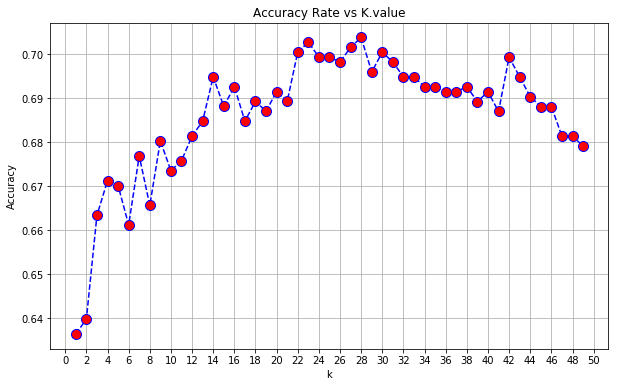

In [162]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.locator_params(axis="x", nbins=50)
plt.title('Accuracy Rate vs K.value')
plt.grid()
plt.xlabel('k')
plt.ylabel('Accuracy')

### <span style="color:green">By observing above fig when k=28 we are getting good accuracy</span>

# Train_test_split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 2) (179, 2) (712,) (179,)


In [49]:
x_train

,Age,Fare
585,18.000000,79.6500
452,30.000000,27.7500
30,40.000000,27.7208
456,65.000000,26.5500
495,29.699118,14.4583
626,57.000000,12.3500
558,39.000000,79.6500
671,31.000000,52.0000
484,25.000000,91.0792
538,29.699118,14.5000


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 2) (179, 2) (712,) (179,)


In [51]:
x_train

,Age,Fare
542,11.000000,31.2750
225,22.000000,9.3500
812,35.000000,10.5000
373,22.000000,135.6333
545,64.000000,26.0000
136,19.000000,26.2833
794,25.000000,7.8958
649,23.000000,7.5500
837,29.699118,8.0500
378,20.000000,4.0125


- here x_train are different because it is randomly taken

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=23)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 2) (179, 2) (712,) (179,)


In [53]:
x_train

,Age,Fare
151,22.000000,66.6000
753,23.000000,7.8958
746,16.000000,20.2500
684,60.000000,39.0000
887,19.000000,30.0000
843,34.500000,6.4375
884,25.000000,7.0500
658,23.000000,13.0000
99,34.000000,26.0000
45,29.699118,8.0500


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=23)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 2) (179, 2) (712,) (179,)


In [55]:
x_train

,Age,Fare
151,22.000000,66.6000
753,23.000000,7.8958
746,16.000000,20.2500
684,60.000000,39.0000
887,19.000000,30.0000
843,34.500000,6.4375
884,25.000000,7.0500
658,23.000000,13.0000
99,34.000000,26.0000
45,29.699118,8.0500


- here we get same x_train because we used random state

In [56]:
# data.to_csv('titanic.cvs')

In [57]:
data.to_csv('titanic.csv')

In [58]:
import os

In [59]:
os.remove('titanic.cvs')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'titanic.cvs'

# <span style="color:#0ee327; font-family: Babas; font-size: 2em">Decision Tree</span>

In [60]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [62]:
x=data[['Age','Fare']] # input
y=data['Survived'] # output/actual value
print(x.shape,y.shape)


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=23)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(891, 2) (891,)
(712, 2) (179, 2) (712,) (179,)


In [63]:
#Agent (or) learning agent
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [64]:
#knn- k=5
#train accuracy 0.7416666666666667
#test accuracy 0.6666666666666666

predictons=dt.predict(x_train) # prediction DT(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=dt.predict(x_test)  # prediction DT(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.9620786516853933
test accuracy 0.6480446927374302


In [65]:
from sklearn import tree

In [66]:
tree_rep=tree.export_text(dt)
tree_rep

'|--- feature_1 <= 10.48\n|   |--- feature_0 <= 16.50\n|   |   |--- feature_1 <= 7.76\n|   |   |   |--- class: 1\n|   |   |--- feature_1 >  7.76\n|   |   |   |--- feature_0 <= 1.21\n|   |   |   |   |--- class: 1\n|   |   |   |--- feature_0 >  1.21\n|   |   |   |   |--- feature_0 <= 15.00\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_0 >  15.00\n|   |   |   |   |   |--- feature_1 <= 7.91\n|   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |--- feature_1 >  7.91\n|   |   |   |   |   |   |--- feature_1 <= 8.78\n|   |   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |   |--- feature_1 >  8.78\n|   |   |   |   |   |   |   |--- class: 0\n|   |--- feature_0 >  16.50\n|   |   |--- feature_0 <= 32.50\n|   |   |   |--- feature_1 <= 7.13\n|   |   |   |   |--- feature_1 <= 6.96\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_1 >  6.96\n|   |   |   |   |   |--- feature_1 <= 7.01\n|   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |--- feat

f0='Age'  
f1='Fare'

In [67]:
print(tree_rep)

|--- feature_1 <= 10.48
|   |--- feature_0 <= 16.50
|   |   |--- feature_1 <= 7.76
|   |   |   |--- class: 1
|   |   |--- feature_1 >  7.76
|   |   |   |--- feature_0 <= 1.21
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  1.21
|   |   |   |   |--- feature_0 <= 15.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  15.00
|   |   |   |   |   |--- feature_1 <= 7.91
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  7.91
|   |   |   |   |   |   |--- feature_1 <= 8.78
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  8.78
|   |   |   |   |   |   |   |--- class: 0
|   |--- feature_0 >  16.50
|   |   |--- feature_0 <= 32.50
|   |   |   |--- feature_1 <= 7.13
|   |   |   |   |--- feature_1 <= 6.96
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  6.96
|   |   |   |   |   |--- feature_1 <= 7.01
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  7.01
|   |   |   |

In [221]:
x

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
5,29.699118,8.4583
6,54.000000,51.8625
7,2.000000,21.0750
8,27.000000,11.1333
9,14.000000,30.0708


In [210]:
data[['Survived']]

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [205]:
!pip install graphviz

In [206]:
from sklearn import tree

[Text(151.9, 209.6742857142857, 'X[1] <= 10.481\ngini = 0.476\nsamples = 712\nvalue = [434, 278]'),
 Text(49.6, 194.14285714285714, 'X[0] <= 16.5\ngini = 0.332\nsamples = 266\nvalue = [210, 56]'),
 Text(37.2, 178.61142857142858, 'gini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(62.0, 178.61142857142858, 'X[0] <= 32.5\ngini = 0.314\nsamples = 256\nvalue = [206, 50]'),
 Text(49.6, 163.07999999999998, 'X[1] <= 7.133\ngini = 0.353\nsamples = 210\nvalue = [162, 48]'),
 Text(37.2, 147.54857142857142, 'gini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(62.0, 147.54857142857142, 'X[1] <= 7.883\ngini = 0.371\nsamples = 191\nvalue = [144, 47]'),
 Text(37.2, 132.01714285714286, 'X[1] <= 7.877\ngini = 0.433\nsamples = 98\nvalue = [67, 31]'),
 Text(24.8, 116.48571428571428, 'X[1] <= 7.183\ngini = 0.409\nsamples = 94\nvalue = [67, 27]'),
 Text(12.4, 100.9542857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(37.2, 100.9542857142857, 'X[1] <= 7.746\ngini = 0.403\nsamples = 93\nvalue = [67,

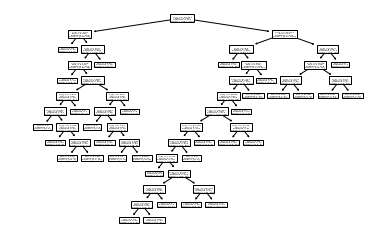

In [223]:
tree.plot_tree(dt)

In [222]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=x.iloc[:,:1], class_names=data[['Survived']],filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ValueError: Length of feature_names, 891 does not match number of features, 2

KeyError: 1

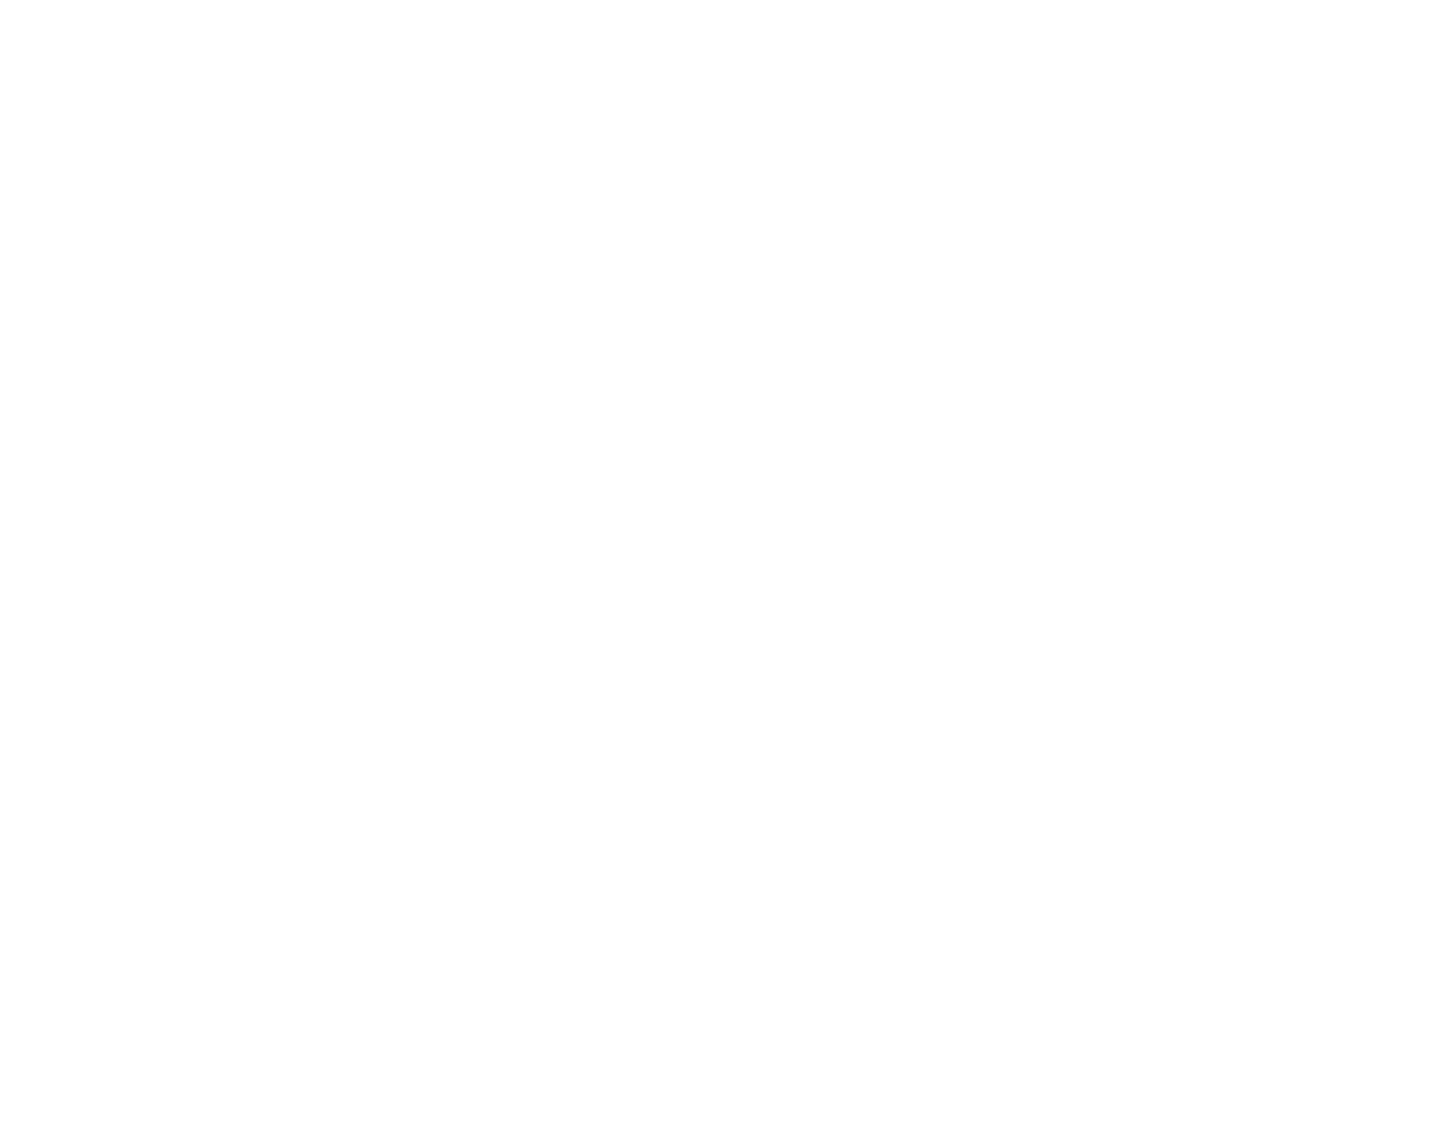

In [148]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt,feature_names=x,class_names=data[['Survived']],filled=True)

In [69]:
!pip install 

ERROR: You must give at least one requirement to install (see "pip help install")


In [70]:
tree.export_graphviz(dt,class)

SyntaxError: invalid syntax (<ipython-input-70-2709867b9059>, line 1)

In [ ]:
tree.plot_tree(dt)

In [ ]:
# here model will over fit 
# we can control this by max_depth, min sample

In [121]:
#knn- k=5
#train accuracy 0.7416666666666667
#test accuracy 0.6666666666666666

#Agent (or) learning agent
dt = DecisionTreeClassifier(max_depth=6,random_state=20)
dt.fit(x_train,y_train)

predictons=dt.predict(x_train) # prediction DT(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=dt.predict(x_test)  # prediction DT(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.7485955056179775
test accuracy 0.7262569832402235


In [122]:
#knn- k=5
#train accuracy 0.7416666666666667
#test accuracy 0.6666666666666666

#Agent (or) learning agent
dt = DecisionTreeClassifier(max_depth=3,random_state=20)
dt.fit(x_train,y_train)

predictons=dt.predict(x_train) # prediction DT(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=dt.predict(x_test)  # prediction DT(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.699438202247191
test accuracy 0.7318435754189944


In [123]:
#knn- k=5
#train accuracy 0.7416666666666667
#test accuracy 0.6666666666666666

#Agent (or) learning agent
dt = DecisionTreeClassifier(max_depth=4,random_state=20)
dt.fit(x_train,y_train)

predictons=dt.predict(x_train) # prediction DT(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=dt.predict(x_test)  # prediction DT(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.702247191011236
test accuracy 0.7486033519553073


- Accuracy is changing when we change max_depth values

### min_samples_split

In [124]:
#knn- k=5
#train accuracy 0.7416666666666667
#test accuracy 0.6666666666666666

#Agent (or) learning agent
dt = DecisionTreeClassifier(min_samples_split=2,random_state=20) #default is 1
dt.fit(x_train,y_train)

predictons=dt.predict(x_train) # prediction DT(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=dt.predict(x_test)  # prediction DT(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.9620786516853933
test accuracy 0.6368715083798883


In [125]:
#knn- k=5
#train accuracy 0.7416666666666667
#test accuracy 0.6666666666666666

#Agent (or) learning agent
dt = DecisionTreeClassifier(min_samples_split=5,random_state=20) #default is 1
dt.fit(x_train,y_train)

predictons=dt.predict(x_train) # prediction DT(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=dt.predict(x_test)  # prediction DT(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.901685393258427
test accuracy 0.659217877094972


In [126]:
#knn- k=5
#train accuracy 0.7416666666666667
#test accuracy 0.6666666666666666

#Agent (or) learning agent
dt = DecisionTreeClassifier(min_samples_split=10,random_state=20) #default is 1
dt.fit(x_train,y_train)

predictons=dt.predict(x_train) # prediction DT(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=dt.predict(x_test)  # prediction DT(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.8426966292134831
test accuracy 0.7039106145251397


In [91]:
#knn- k=5
#train accuracy 0.7416666666666667
#test accuracy 0.6666666666666666

#Agent (or) learning agent
dt = DecisionTreeClassifier(min_samples_split=20) #default is 1
dt.fit(x_train,y_train)

predictons=dt.predict(x_train) # prediction DT(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=dt.predict(x_test)  # prediction DT(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.7893258426966292
test accuracy 0.6983240223463687


- Instead of typing multiple times

In [172]:
train=[]
test=[]
for i in range(2,50,2):
    #knn- k=5
    #train accuracy 0.7416666666666667
    #test accuracy 0.6666666666666666

    #Agent (or) learning agent
    dt = DecisionTreeClassifier(min_samples_split=i,random_state=20) #default is 1
    dt.fit(x_train,y_train)
    
    print('='*20,i)

    predictons=dt.predict(x_train) # prediction DT(input) -> predictions on train example
    print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)
    train.append(accuracy_score(y_train,predictons))



    predictons=dt.predict(x_test)  # prediction DT(input) -> predictions on test [exercise]
    print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)
    test.append(accuracy_score(y_test,predictons))
    print("="*20)

==================== 2
train accuracy 0.9620786516853933
test accuracy 0.6368715083798883
==================== 4
train accuracy 0.9157303370786517
test accuracy 0.6536312849162011
==================== 6
train accuracy 0.8904494382022472
test accuracy 0.6815642458100558
==================== 8
train accuracy 0.8623595505617978
test accuracy 0.6983240223463687
==================== 10
train accuracy 0.8426966292134831
test accuracy 0.7039106145251397
==================== 12
train accuracy 0.8314606741573034
test accuracy 0.6927374301675978
==================== 14
train accuracy 0.8230337078651685
test accuracy 0.6871508379888268
==================== 16
train accuracy 0.8117977528089888
test accuracy 0.6927374301675978
==================== 18
train accuracy 0.8089887640449438
test accuracy 0.6983240223463687
==================== 20
train accuracy 0.7893258426966292
test accuracy 0.6983240223463687
==================== 22
train accuracy 0.7794943820224719
test accuracy 0.7150837988826816
===

In [175]:
train

[0.9620786516853933,
 0.9157303370786517,
 0.8904494382022472,
 0.8623595505617978,
 0.8426966292134831,
 0.8314606741573034,
 0.8230337078651685,
 0.8117977528089888,
 0.8089887640449438,
 0.7893258426966292,
 0.7794943820224719,
 0.7752808988764045,
 0.7752808988764045,
 0.7780898876404494,
 0.7668539325842697,
 0.7598314606741573,
 0.7598314606741573,
 0.7556179775280899,
 0.7556179775280899,
 0.7556179775280899,
 0.7528089887640449,
 0.7528089887640449,
 0.75,
 0.75]

In [176]:
trainacc=[]
for i in train:
    trainacc.append(("%.2f" % i))

In [177]:
trainacc

['0.96',
 '0.92',
 '0.89',
 '0.86',
 '0.84',
 '0.83',
 '0.82',
 '0.81',
 '0.81',
 '0.79',
 '0.78',
 '0.78',
 '0.78',
 '0.78',
 '0.77',
 '0.76',
 '0.76',
 '0.76',
 '0.76',
 '0.76',
 '0.75',
 '0.75',
 '0.75',
 '0.75']

In [178]:
testacc=[]
for i in test:
    testacc.append(("%.2f" % i))

In [179]:
testacc

['0.64',
 '0.65',
 '0.68',
 '0.70',
 '0.70',
 '0.69',
 '0.69',
 '0.69',
 '0.70',
 '0.70',
 '0.72',
 '0.71',
 '0.71',
 '0.72',
 '0.71',
 '0.71',
 '0.71',
 '0.71',
 '0.71',
 '0.71',
 '0.70',
 '0.70',
 '0.69',
 '0.69']

In [180]:
import seaborn as sns

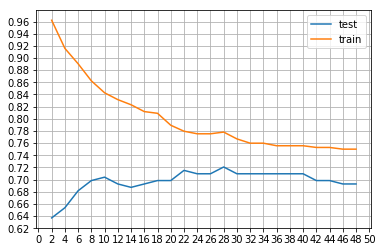

In [202]:
sns.lineplot(x=np.arange(2,50,2),y=test)
sns.lineplot(x=np.arange(2,50,2),y=train)
plt.legend(['test','train'])
plt.locator_params(axis="x", nbins=50)
plt.locator_params(axis="y", nbins=25)
plt.grid()
plt.show()

- at **min_samples_split=40** we are getting good accuracy

### min_samples_split & max_depth

In [152]:
#knn- k=5
#train accuracy 0.7416666666666667
#test accuracy 0.6666666666666666

#Agent (or) learning agent
dt = DecisionTreeClassifier(min_samples_split=2,max_depth=6,random_state=20) #default is 1
dt.fit(x_train,y_train)

predictons=dt.predict(x_train) # prediction DT(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=dt.predict(x_test)  # prediction DT(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.7485955056179775
test accuracy 0.7262569832402235


- Instead of typing multiple times

In [129]:
for i in range(2,50,2):
    #knn- k=5
    #train accuracy 0.7416666666666667
    #test accuracy 0.6666666666666666

    #Agent (or) learning agent
    dt = DecisionTreeClassifier(min_samples_split=i,max_depth=6,random_state=20) #default is 1
    dt.fit(x_train,y_train)
    
    print('='*20,i)

    predictons=dt.predict(x_train) # prediction DT(input) -> predictions on train example
    print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



    predictons=dt.predict(x_test)  # prediction DT(input) -> predictions on test [exercise]
    print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)
    print("="*20)

==================== 2
train accuracy 0.7485955056179775
test accuracy 0.7262569832402235
==================== 4
train accuracy 0.7485955056179775
test accuracy 0.7262569832402235
==================== 6
train accuracy 0.7485955056179775
test accuracy 0.7262569832402235
==================== 8
train accuracy 0.7471910112359551
test accuracy 0.7262569832402235
==================== 10
train accuracy 0.7415730337078652
test accuracy 0.7206703910614525
==================== 12
train accuracy 0.7359550561797753
test accuracy 0.7094972067039106
==================== 14
train accuracy 0.7359550561797753
test accuracy 0.7094972067039106
==================== 16
train accuracy 0.7345505617977528
test accuracy 0.7094972067039106
==================== 18
train accuracy 0.7345505617977528
test accuracy 0.7094972067039106
==================== 20
train accuracy 0.723314606741573
test accuracy 0.7094972067039106
==================== 22
train accuracy 0.723314606741573
test accuracy 0.7094972067039106
=====

- at **min_samples_split=10 & max_depth=6** getting goog accuracy

In [133]:
dt = DecisionTreeClassifier(min_samples_split=10,max_depth=6,random_state=20) #default is 1
dt.fit(x_train,y_train)
    
print('='*20,10)

predictons=dt.predict(x_train) # prediction DT(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=dt.predict(x_test)  # prediction DT(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)
print("="*20)

==================== 10
train accuracy 0.7415730337078652
test accuracy 0.7206703910614525


>knn- k=5  
>>train accuracy 0.7416666666666667  
>>test accuracy 0.6666666666666666


>DT  min_samples_split=10 & max_depth=6  
>>train accuracy 0.7415730337078652  
>>test accuracy 0.7206703910614525

#### underfitting
- Bad at Train + Bad at Test

#### overfitting
- Good at Train + Bad at Test

- **Underfit**

In [74]:
dt = DecisionTreeClassifier(min_samples_split=2,max_depth=1) #default is 1
dt.fit(x_train,y_train)
    
print('='*20,34)

predictons=dt.predict(x_train) # prediction DT(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=dt.predict(x_test)  # prediction DT(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)
print("="*20)

==================== 34
train accuracy 0.6095505617977528
test accuracy 0.6424581005586593


- **perfect fit**

In [75]:
dt = DecisionTreeClassifier(min_samples_split=34,max_depth=6) #default is 1
dt.fit(x_train,y_train)
    
print('='*20,34)

predictons=dt.predict(x_train) # prediction DT(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=dt.predict(x_test)  # prediction DT(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)
print("="*20)

==================== 34
train accuracy 0.723314606741573
test accuracy 0.7094972067039106


- **Overfit**

In [76]:
dt = DecisionTreeClassifier(min_samples_split=2) #default is 1
dt.fit(x_train,y_train)
    
print('='*20,34)

predictons=dt.predict(x_train) # prediction DT(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=dt.predict(x_test)  # prediction DT(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)
print("="*20)

==================== 34
train accuracy 0.9620786516853933
test accuracy 0.6480446927374302


### <span style="color:green">we need to play with parameters only those scenarios, purpose of parameters is you dont want your algorithm to perform UNDERFIT(underperform) or OVERFIT</span>

# <span style="color:#0ee327; font-family: Babas; font-size: 2em">Random Forest</span>

In [ ]:
# Decision Tree tends to overfit
    1. Parameters - Varables(Age, Fare)
    2. Hyper Parameters - depth, min_sample_split
    3. Random Forest

In [ ]:
Decision Tree : 1 Tree

Multiple DT : Forest

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [35]:
x=data[['Age','Fare']] # input
y=data['Survived'] # output

In [7]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 2) (179, 2) (712,) (179,)


In [12]:
from sklearn.metrics import accuracy_score

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
    
predictons=rf.predict(x_train) # prediction Df(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=rf.predict(x_test)  # prediction RF(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.9564606741573034
test accuracy 0.659217877094972


In [51]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
    
predictons=rf.predict(x_train) # prediction Df(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=rf.predict(x_test)  # prediction RF(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.9592696629213483
test accuracy 0.6201117318435754


In [38]:
rf = RandomForestClassifier(min_samples_split=36, max_depth=6,random_state=0) 
rf.fit(x_train,y_train)
    
predictons=rf.predict(x_train) # prediction Df(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=rf.predict(x_test)  # prediction RF(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.7387640449438202
test accuracy 0.6815642458100558


In [39]:
rf = RandomForestClassifier(n_estimators=500,min_samples_split=36, max_depth=3,random_state=0) 
rf.fit(x_train,y_train)
    
predictons=rf.predict(x_train) # prediction Df(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=rf.predict(x_test)  # prediction RF(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.7106741573033708
test accuracy 0.6759776536312849


In [ ]:
Import Data -> Processing -> EDA -> Processing ->
ML -> EDA -> Processing -> ML -> Processing -> ML

In [ ]:
Import Data -> Processing 1-> EDA -> Processing 2 ->
ML(Simple) -> EDA -> Processing 3-> ML(Simple) -> Processing 4-> ML(Simple)/ML(Complex 1)/ML(DT)/ML(KNN)

In [ ]:
First we need to go with simple algo the we need to shift to complx algo

In [ ]:
If we go with complex first it takes lot of time and we need to check again and again

# IMP

In [ ]:
8 Variales
200 trees


500mb   [200* (2 ^8)] # 200 trees times every person has 2 answers and power how many variables we have

In [ ]:
# Random forest is not interpretible DT is

## Challenges

In [ ]:
KNN - Depends on processor (Time complexity)
DT - RAM (Memory Complex)
Random Forest (100DT) -> Memory Complex

In [ ]:
Naive Bayes- Does not Require lot of time and memory also

In [ ]:
resources (good data, good computer) vs Accuracy

# <span style="color:#0ee327; font-family: Babas; font-size: 2em">Naive Bayes</span>

In [4]:
data=pd.read_csv('titanic.csv')

In [5]:
x=data[['Age','Fare']] # input
y=data['Survived'] # output

In [6]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=23)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 2) (179, 2) (712,) (179,)


In [27]:
from sklearn.naive_bayes import GaussianNB

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
clf=MultinomialNB()
clf.fit(x,y)

MultinomialNB()

In [32]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
    
predictons=nb.predict(x_train) # prediction Df(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=nb.predict(x_test)  # prediction RF(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.6980337078651685
test accuracy 0.6536312849162011


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=23)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(712, 2) (179, 2) (712,) (179,)


In [43]:
nb = MultinomialNB()
nb.fit(x_train,y_train)
    
predictons=nb.predict(x_train) # prediction Df(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=nb.predict(x_test)  # prediction RF(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.6811797752808989
test accuracy 0.7262569832402235


In [42]:
nb = MultinomialNB(class_prior=(0.1,0.9))
nb.fit(x_train,y_train)
    
predictons=nb.predict(x_train) # prediction Df(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=nb.predict(x_test)  # prediction RF(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.6839887640449438
test accuracy 0.7039106145251397


In [44]:
nb = MultinomialNB(class_prior=(0.7,0.3))
nb.fit(x_train,y_train)
    
predictons=nb.predict(x_train) # prediction Df(input) -> predictions on train example
print("train accuracy",accuracy_score(y_train,predictons)) #evaluation on test(y)



predictons=nb.predict(x_test)  # prediction RF(input) -> predictions on test [exercise]
print("test accuracy",accuracy_score(y_test,predictons)) # evaluation on test (y)

train accuracy 0.6811797752808989
test accuracy 0.7262569832402235


In [56]:
data.head()

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [58]:
nb.predict([[26,7.9]])

array([0], dtype=int64)

In [61]:
rf.predict([[38,71.28]])

array([1], dtype=int64)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn=KNeighborsClassifier()

In [64]:
knn.fit(x,y)

KNeighborsClassifier()

In [65]:
knn.predict([[26,7.9]])

array([0], dtype=int64)

# JOBLIB

In [52]:
from joblib import dump, load
dump(rf, 'custom_rf.joblib') 

['custom_rf.joblib']

# <span style="color:red">K NEAREST NEIGHBORS(KNN)</span>
# <span style="color:green">K NEAREST NEIGHBORS(KNN)</span>
# <span style="color:blue">K NEAREST NEIGHBORS(KNN)</span>
# <span style="color:orange; font-family:Audiowide">K NEAREST NEIGHBORS(KNN)</span>
# <span style="color:yellow ">K NEAREST NEIGHBORS(KNN)</span>
# <span style="color:brown">K NEAREST NEIGHBORS(KNN)</span>
# <span style="color:purple">K NEAREST NEIGHBORS(KNN)</span>
# <span style="color:pink">K NEAREST NEIGHBORS(KNN)</span>
# <span style="color:black">K NEAREST NEIGHBORS(KNN)</span>
# <span style="color:skyblue">K NEAREST NEIGHBORS(KNN)</span>
# <span style="color:lightgreen">K NEAREST NEIGHBORS(KNN)</span>
# <span style="color:cyan">K NEAREST NEIGHBORS(KNN)</span>
# <span style="color:#c8ed40">K NEAREST NEIGHBORS(KNN)</span>


In [ ]:
pip install pydataset

In [ ]:
from pydataset import data

#titanic = data('titanic')

In [ ]:
titanic=data('titanic')

In [ ]:
titanic

In [ ]:
library(help='datasets')

In [ ]:
pd.read('https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv')

In [2]:
pd.read_csv('titanic.csv')

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833
2,2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000
4,4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000
887,887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000
888,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500
889,889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000
